In [20]:
import json
import numpy as np
import os
import sys
from glob import glob
import matplotlib.pyplot as plt
import healpy as hp
import logging
import argparse

from src.analysis.kappamap import KappaCodes
from src.masssheet.ConfigData import ConfigAnalysis

In [2]:
zs_list = [0.5, 1, 2, 3]
sl_list = [5, 8, 10]

#choose all files which have the same redshift
def choose_file(dat_list, z):
    res = []
    for dat in dat_list:
        if "zs{:.1f}".format(z) in os.path.basename(dat):
            res.append(dat)
    return res

def choose_file_sl(dat_list, sl):
    res = []
    for dat in dat_list:
        if "sl{:d}".format(sl) in os.path.basename(dat):
            res.append(dat)
    return res

In [7]:
config_analysis_file = os.path.join("/lustre/work/akira.tokiwa/Projects/LensingSSC/configs", 'config_analysis.json')
config_analysis = ConfigAnalysis.from_json(config_analysis_file)
dir_img = os.path.join(config_analysis.imgdir, "comparison")

dir_PDF_tiled = os.path.join(config_analysis.resultsdir, "tiled", "PDF")
dir_peaks_tiled = os.path.join(config_analysis.resultsdir, "tiled", "peaks")
dir_minima_tiled = os.path.join(config_analysis.resultsdir, "tiled", "minima")

dir_PDF_bigbox = os.path.join(config_analysis.resultsdir, "bigbox", "PDF")
dir_peaks_bigbox = os.path.join(config_analysis.resultsdir, "bigbox", "peaks")
dir_minima_bigbox = os.path.join(config_analysis.resultsdir, "bigbox", "minima")

In [8]:
dat_PDF_tiled = sorted(glob(os.path.join(dir_PDF_tiled, "*.dat")))
dat_peaks_tiled = sorted(glob(os.path.join(dir_peaks_tiled, "*.dat")))
dat_minima_tiled = sorted(glob(os.path.join(dir_minima_tiled, "*.dat")))

dat_PDF_bigbox = sorted(glob(os.path.join(dir_PDF_bigbox, "*.dat")))
dat_peaks_bigbox = sorted(glob(os.path.join(dir_peaks_bigbox, "*.dat")))
dat_minima_bigbox = sorted(glob(os.path.join(dir_minima_bigbox, "*.dat")))

In [47]:
config_analysis_file = os.path.join("/lustre/work/akira.tokiwa/Projects/LensingSSC/configs", 'config_analysis.json')
config_analysis = ConfigAnalysis.from_json(config_analysis_file)

dir_results = os.path.join(config_analysis.resultsdir, "tiled")
filenames = sorted(glob(os.path.join(dir_results, "smoothed", f"kappa_zs0.5_smoothed_s*.fits")))
kappa_maps_tiled = KappaCodes(dir_results=dir_results, filenames=filenames, nside=config_analysis.nside, lmax=config_analysis.lmax)
kappa_maps_tiled.readmaps_healpy()

dir_results = os.path.join(config_analysis.resultsdir, "bigbox")
filenames = sorted(glob(os.path.join(dir_results, "smoothed", f"kappa_zs0.5_smoothed_s*.fits")))
kappa_maps_bigbox = KappaCodes(dir_results=dir_results, filenames=filenames, nside=config_analysis.nside, lmax=config_analysis.lmax)
kappa_maps_bigbox.readmaps_healpy()

# Plot Kappa Map

In [49]:
dir_kappa_tiled = os.path.join(config_analysis.resultsdir, "tiled", "data")
dir_kappa_bigbox = os.path.join(config_analysis.resultsdir, "bigbox", "data")

dat_kappa_tiled = sorted(glob(os.path.join(dir_kappa_tiled, "kappa_zs*.fits")))
dat_kappa_bigbox = sorted(glob(os.path.join(dir_kappa_bigbox, "kappa_zs*.fits")))

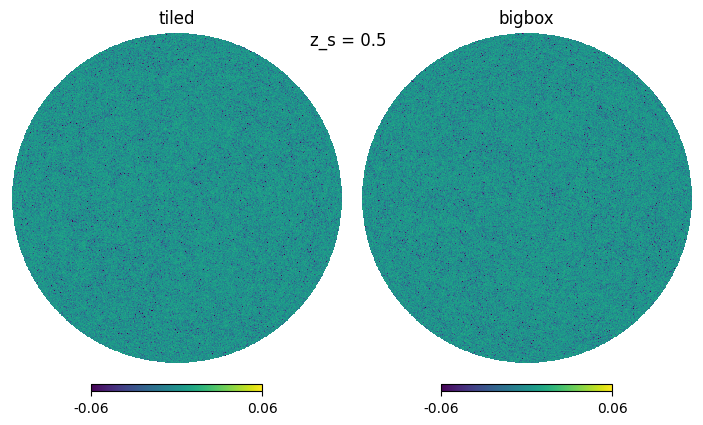

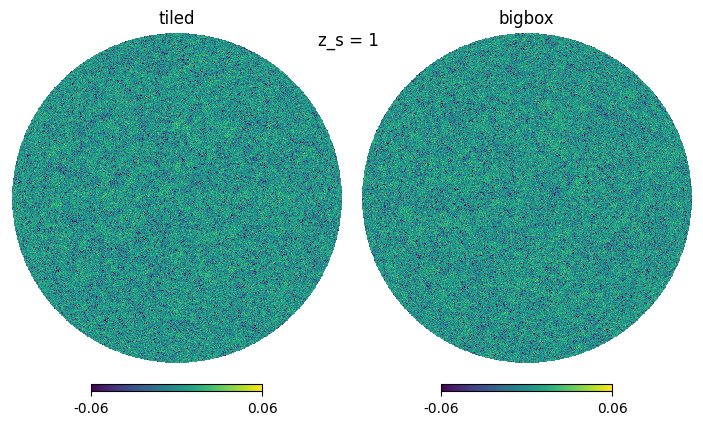

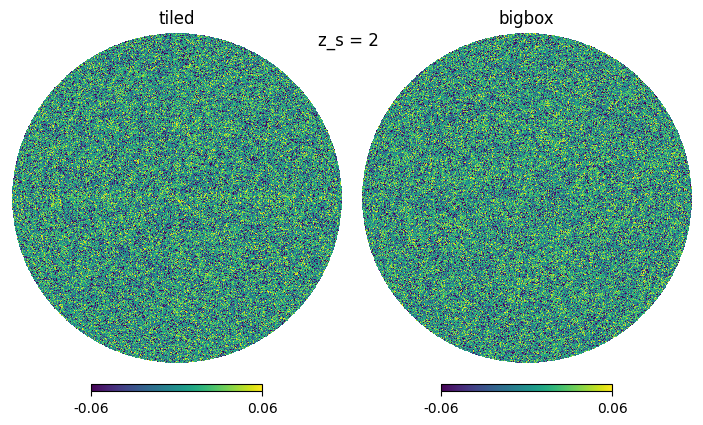

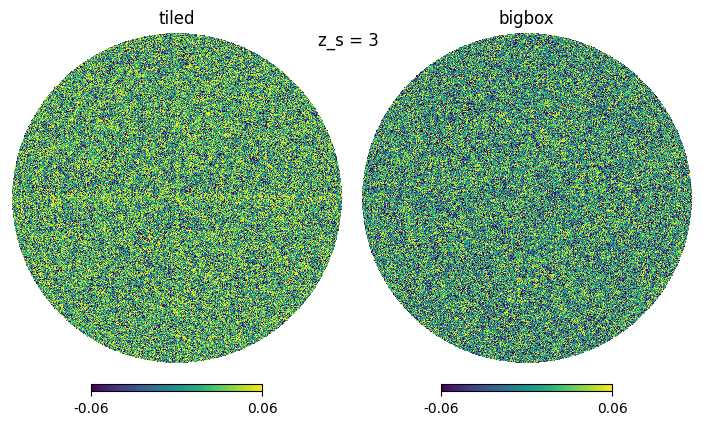

In [62]:
zs_list = [0.5, 1, 2, 3]
for i in range(len(zs_list)):
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"z_s = {zs_list[i]}")

    kappa_tiled = hp.read_map(dat_kappa_tiled[i])
    kappa_bigbox = hp.read_map(dat_kappa_bigbox[i])

    hp.orthview(kappa_tiled, title=f"tiled", sub=(1, 2, 1), fig=fig, min=-0.06, max=0.06, nest=True, half_sky=True)
    hp.orthview(kappa_bigbox, title=f"bigbox", sub=(1, 2, 2), fig=fig, min=-0.06, max=0.06, nest=True, half_sky=True)

    #fig.savefig(os.path.join(dir_img, f"kappa_zs{zs_list[i]}.png"), bbox_inches='tight') 

# plot PDF

0.00804020100502513


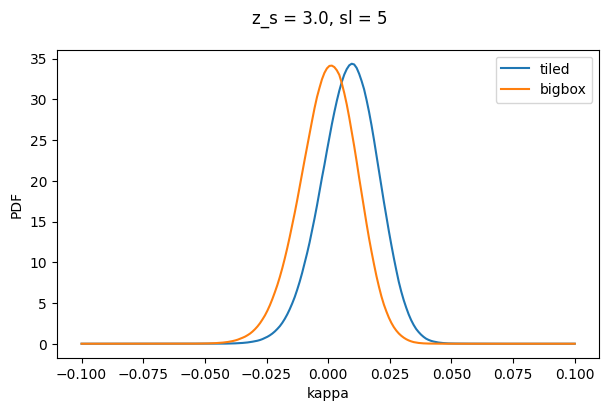

0.008040201005025116


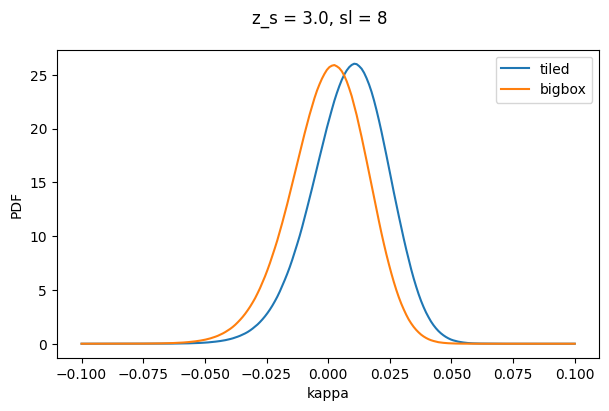

0.00804020100502513


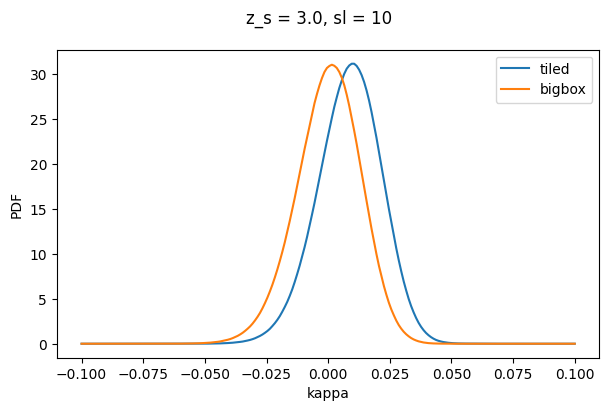

In [67]:
# check the peak difference of PDF, zs = 3.0
zs = 3.0
tmp_dat_PDF_tiled = choose_file(dat_PDF_tiled, zs)
tmp_dat_PDF_bigbox = choose_file(dat_PDF_bigbox, zs)

bins = np.linspace(-0.1, 0.1, 200)

for i in range(len(tmp_dat_PDF_tiled)):
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"z_s = {zs}, sl = {sl_list[i]}")

    PDF_tiled = np.loadtxt(tmp_dat_PDF_tiled[i])
    PDF_bigbox = np.loadtxt(tmp_dat_PDF_bigbox[i])
    
    # where is the peak difference
    peak_tiled = np.argmax(PDF_tiled)
    peak_bigbox = np.argmax(PDF_bigbox)
    amp = bins[peak_tiled] - bins[peak_bigbox]

    print(amp)

    plt.plot(bins, PDF_tiled, label="tiled")   
    plt.plot(bins, PDF_bigbox, label="bigbox")
    plt.legend()
    plt.xlabel("kappa")
    plt.ylabel("PDF")
    plt.show()

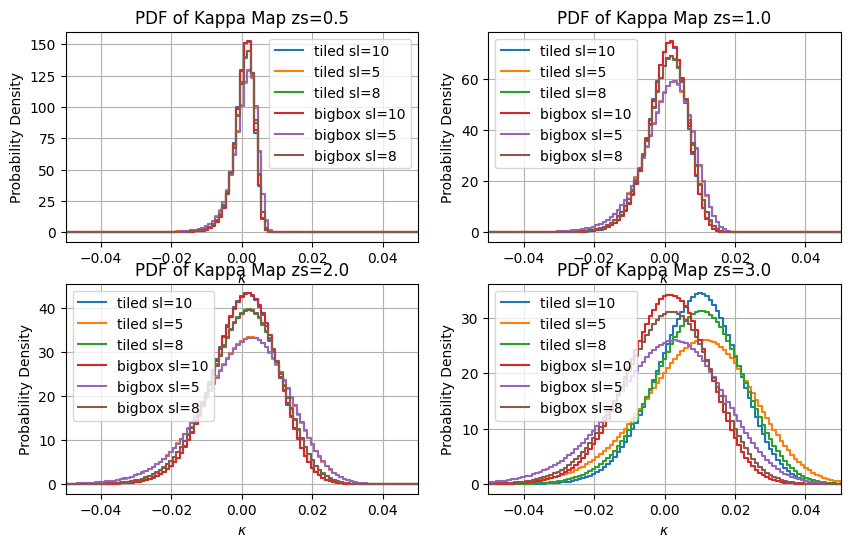

In [56]:
bins = np.linspace(-0.1, 0.1, 200)

# Plot the PDF
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
for i, zs in enumerate(zs_list):
    tmp_dat = choose_file(dat_PDF_tiled + dat_PDF_bigbox, zs)
    for data_file in tmp_dat:
        counts = np.loadtxt(data_file)
        config_id = data_file.split("/")[-3]
        smoothing_length = data_file.split("/")[-1].split("_")[3][1:]
        label = config_id + " sl={:s}".format(smoothing_length)
        ax.flatten()[i].plot(bins, counts, drawstyle='steps-post', label=label)
    ax.flatten()[i].set_xlim(-0.05, 0.05)
    ax.flatten()[i].set_xlabel(r'$\kappa$')
    ax.flatten()[i].set_ylabel('Probability Density')
    ax.flatten()[i].set_title('PDF of Kappa Map zs={:.1f}'.format(zs))
    ax.flatten()[i].grid(True)
    ax.flatten()[i].legend()
fig.savefig(os.path.join(dir_img, "PDF.png"), bbox_inches='tight')
plt.show()

# plot Peak Count

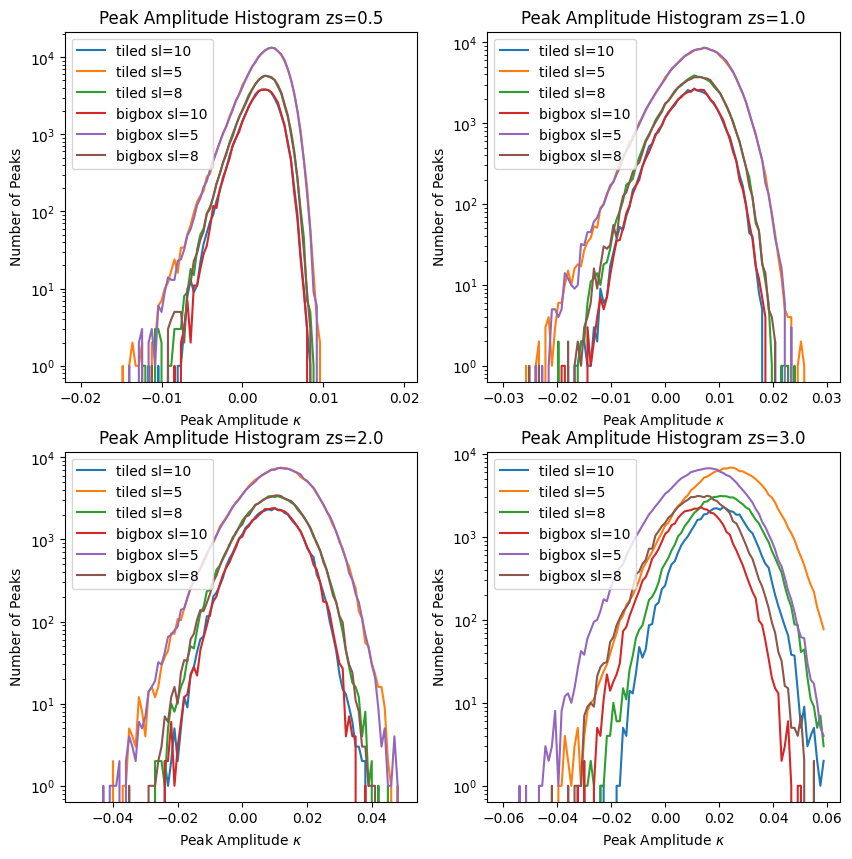

In [10]:
# make a histogram of peak amplitudes, range from -0.01 to 0.02
# plot the histogram overlayed 

range_maxs = [0.02, 0.03, 0.05, 0.06]
 
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, z in enumerate(zs_list):
    tmp_dat = choose_file(dat_peaks_tiled + dat_peaks_bigbox, z)
    for dat in tmp_dat:
        sample = np.loadtxt(dat)
        peak_amp = sample[:, 2]
        hist, bin_edges = np.histogram(peak_amp, bins=100, range=(-range_maxs[i], range_maxs[i]))
        config_id = dat.split("/")[-3]
        smoothing_length = dat.split("/")[-1].split("_")[3][1:]
        label = config_id + " sl={:s}".format(smoothing_length)
        ax.flatten()[i].plot(bin_edges[:-1], hist, label=label)
    ax.flatten()[i].set_yscale("log")
    ax.flatten()[i].set_xlabel(r"Peak Amplitude $\kappa$")
    ax.flatten()[i].set_ylabel("Number of Peaks")
    ax.flatten()[i].set_title("Peak Amplitude Histogram zs={:.1f}".format(z))
    ax.flatten()[i].legend()

fig.savefig(os.path.join(dir_img, "peaks_histogram.png"), bbox_inches="tight")
plt.show()    

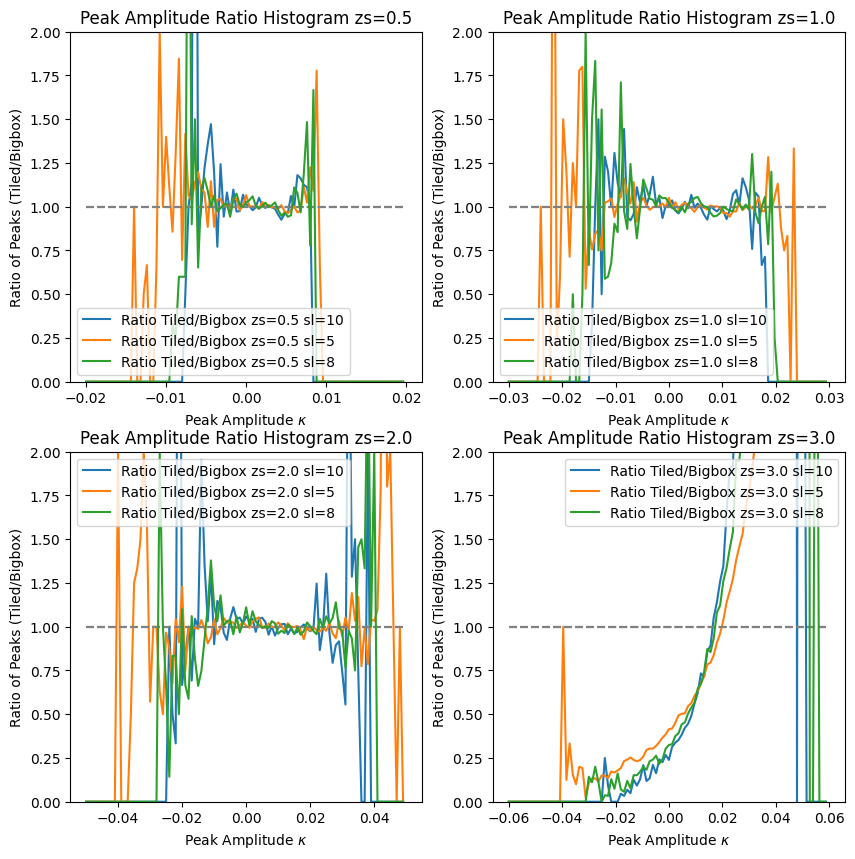

In [11]:
range_maxs = [0.02, 0.03, 0.05, 0.06]
zs_list = [0.5, 1.0, 2.0, 3.0]  # example redshift values, modify as needed

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, z in enumerate(zs_list):
    dat_tiled = choose_file(dat_peaks_tiled, z)
    dat_bigbox = choose_file(dat_peaks_bigbox, z)
    
    # Load and calculate histogram for tiled data
    for j, dat1, dat2 in zip(range(len(dat_tiled)), dat_tiled, dat_bigbox):
        smoothing_length = dat1.split("/")[-1].split("_")[3][1:]

        sample1 = np.loadtxt(dat1)
        sample2 = np.loadtxt(dat2)

        peak_amp1 = sample1[:, 2]
        peak_amp2 = sample2[:, 2]

        hist1, bin_edges = np.histogram(peak_amp1, bins=100, range=(-range_maxs[i], range_maxs[i]))
        hist2, _ = np.histogram(peak_amp2, bins=100, range=(-range_maxs[i], range_maxs[i]))

        # Compute the ratio, avoid division by zero
        ratio = np.divide(hist1, hist2, out=np.zeros_like(hist2, dtype=float), where=hist2 != 0)

        ax.flatten()[i].hlines(1, bin_edges[0], bin_edges[-1], colors='gray', linestyles='dashed')
        ax.flatten()[i].plot(bin_edges[:-1], ratio, label=f"Ratio Tiled/Bigbox zs={z:.1f} sl={smoothing_length}")
        ax.flatten()[i].set_ylim(0, 2)
        ax.flatten()[i].set_xlabel(r"Peak Amplitude $\kappa$")
        ax.flatten()[i].set_ylabel("Ratio of Peaks (Tiled/Bigbox)")
        ax.flatten()[i].set_title(f"Peak Amplitude Ratio Histogram zs={z:.1f}")
        ax.flatten()[i].legend()

fig.savefig(os.path.join(dir_img, "peaks_histogram_ratio.png"), bbox_inches="tight")
plt.show()


# Plot Minima Counts

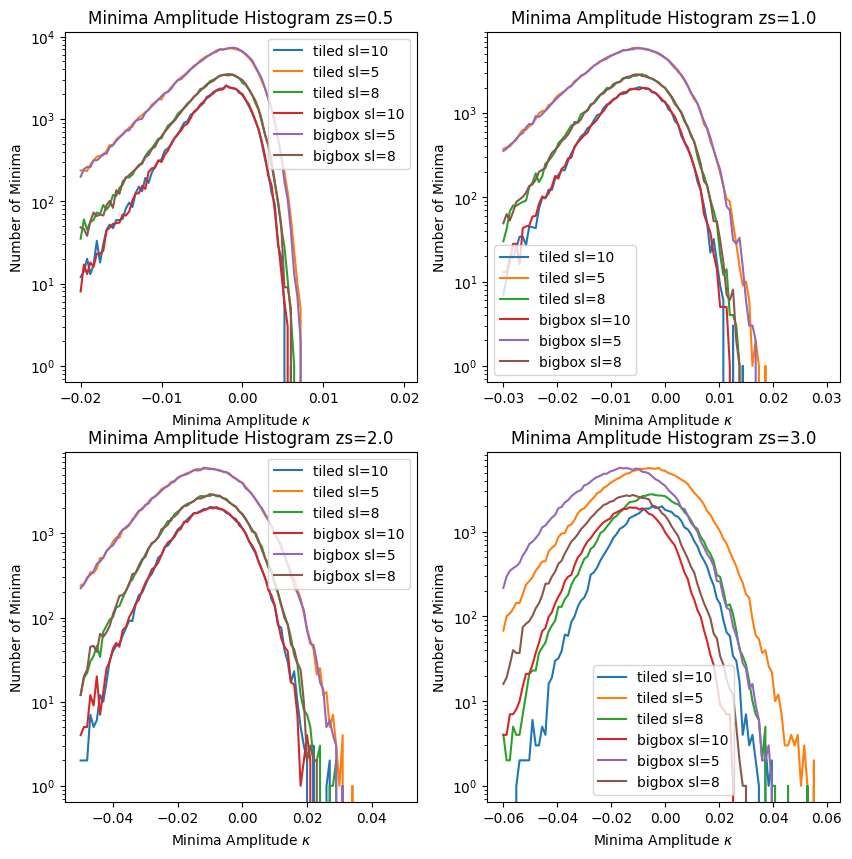

In [12]:
range_maxs = [0.02, 0.03, 0.05, 0.06]
 
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, z in enumerate(zs_list):
    tmp_dat = choose_file(dat_minima_tiled + dat_minima_bigbox, z)
    for dat in tmp_dat:
        sample = np.loadtxt(dat)
        minima_amp = sample[:, 2]
        hist, bin_edges = np.histogram(minima_amp, bins=100, range=(-range_maxs[i], range_maxs[i]))
        config_id = dat.split("/")[-3]
        smoothing_length = dat.split("/")[-1].split("_")[3][1:]
        label = config_id + " sl={:s}".format(smoothing_length)
        ax.flatten()[i].plot(bin_edges[:-1], hist, label=label)
    ax.flatten()[i].set_yscale("log")
    ax.flatten()[i].set_xlabel(r"Minima Amplitude $\kappa$")
    ax.flatten()[i].set_ylabel("Number of Minima")
    ax.flatten()[i].set_title("Minima Amplitude Histogram zs={:.1f}".format(z))
    ax.flatten()[i].legend()

fig.savefig(os.path.join(dir_img, "minima_histogram.png"), bbox_inches="tight")
plt.show()   

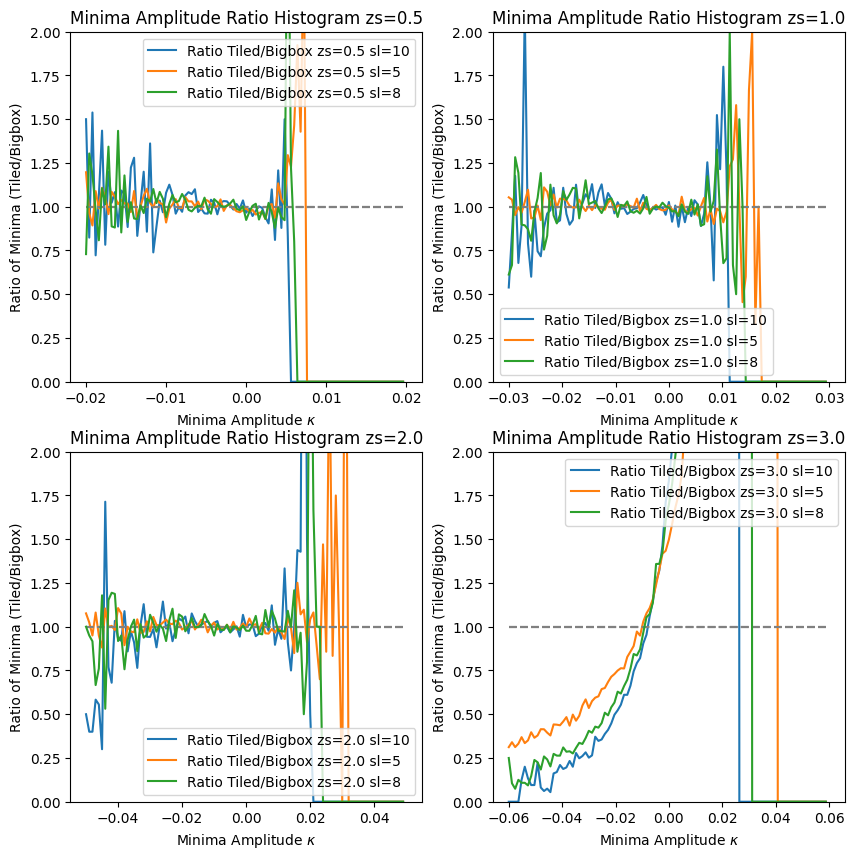

In [13]:
range_maxs = [0.02, 0.03, 0.05, 0.06]
zs_list = [0.5, 1.0, 2.0, 3.0]  # example redshift values, modify as needed

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, z in enumerate(zs_list):
    dat_tiled = choose_file(dat_minima_tiled, z)
    dat_bigbox = choose_file(dat_minima_bigbox, z)
    
    # Load and calculate histogram for tiled data
    for j, dat1, dat2 in zip(range(len(dat_tiled)), dat_tiled, dat_bigbox):
        smoothing_length = dat1.split("/")[-1].split("_")[3][1:]

        sample1 = np.loadtxt(dat1)
        sample2 = np.loadtxt(dat2)

        minima_amp1 = sample1[:, 2]
        minima_amp2 = sample2[:, 2]

        hist1, bin_edges = np.histogram(minima_amp1, bins=100, range=(-range_maxs[i], range_maxs[i]))
        hist2, _ = np.histogram(minima_amp2, bins=100, range=(-range_maxs[i], range_maxs[i]))

        # Compute the ratio, avoid division by zero
        ratio = np.divide(hist1, hist2, out=np.zeros_like(hist2, dtype=float), where=hist2 != 0)

        ax.flatten()[i].hlines(1, bin_edges[0], bin_edges[-1], colors='gray', linestyles='dashed')
        ax.flatten()[i].plot(bin_edges[:-1], ratio, label=f"Ratio Tiled/Bigbox zs={z:.1f} sl={smoothing_length}")
        ax.flatten()[i].set_ylim(0, 2)
        ax.flatten()[i].set_xlabel(r"Minima Amplitude $\kappa$")
        ax.flatten()[i].set_ylabel("Ratio of Minima (Tiled/Bigbox)")
        ax.flatten()[i].set_title(f"Minima Amplitude Ratio Histogram zs={z:.1f}")
        ax.flatten()[i].legend()

fig.savefig(os.path.join(dir_img, "minima_histogram_ratio.png"), bbox_inches="tight")
plt.show()